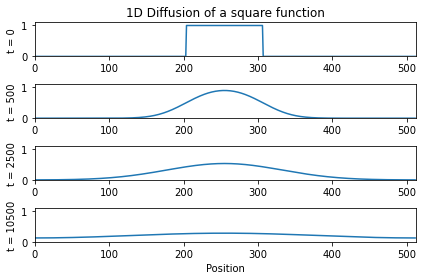

In [1]:
# 忽略代码警告类提示信息
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

grid_size = (512,)# 512维


def laplacian(grid):
    return np.roll(grid, +1) + np.roll(grid, -1) - 2 * grid


def evolve(grid, dt, D=1):
    return grid + dt * D * laplacian(grid)


if __name__ == "__main__":
    grid = np.zeros(grid_size)
    max_val = 1.0

    block_low = int(grid_size[0] * 0.4)
    block_high = int(grid_size[0] * 0.6)
    grid[block_low:block_high] = max_val

    t = 0
    grids = [(t, grid.copy())]
    for i in range(3):
        for i in range(5000 * (4 ** i) + 1):
            grid = evolve(grid, 0.1)
        t += i * 0.1
        grids.append((t, grid.copy()))

    plt.figure()
    for i, (t, grid) in enumerate(grids):
        plt.subplot(len(grids), 1, i + 1)
        plt.plot(grid)
        plt.ylabel("t = %0.0f" % t)
        plt.ylim(ymin=0, ymax=max_val * 1.1)
        plt.xlim(xmin=0, xmax=grid_size[0])

    plt.xlabel("Position")

    plt.subplot(len(grids), 1, 1)
    plt.title("1D Diffusion of a square function")

    plt.tight_layout()
    plt.show()

In [2]:
!pip install numexpr

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


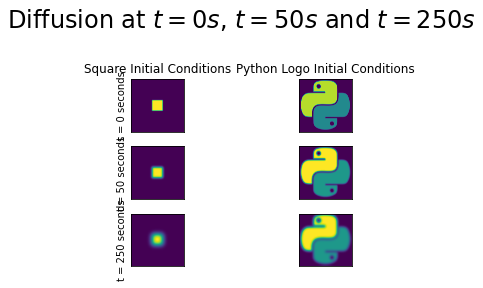

In [3]:
import urllib.error
import urllib.parse
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

from numexpr import evaluate
from numpy import add, asarray, copyto, empty, multiply, zeros

grid_shape = (512, 512)


def roll_add(rollee, shift, axis, out):
    if shift == 1 and axis == 0:
        out[1:, :] += rollee[:-1, :]
        out[0, :] += rollee[-1, :]
    elif shift == -1 and axis == 0:
        out[:-1, :] += rollee[1:, :]
        out[-1, :] += rollee[0, :]
    elif shift == 1 and axis == 1:
        out[:, 1:] += rollee[:, :-1]
        out[:, 0] += rollee[:, -1]
    elif shift == -1 and axis == 1:
        out[:, :-1] += rollee[:, 1:]
        out[:, -1] += rollee[:, 0]


def laplacian(grid, out):
    copyto(out, grid)
    multiply(out, -4.0, out)
    roll_add(grid, +1, 0, out)
    roll_add(grid, -1, 0, out)
    roll_add(grid, +1, 1, out)
    roll_add(grid, -1, 1, out)


def evolve(grid, dt, out, D=1):
    laplacian(grid, out)
    evaluate("out*D*dt+grid", out=out)


if __name__ == "__main__":
    scratch_square = empty(grid_shape)
    grid_square = zeros(grid_shape)
    block_low = int(grid_shape[0] * 0.4)
    block_high = int(grid_shape[0] * 0.6)
    grid_square[block_low:block_high, block_low:block_high] = 0.005

    grid_python = 1 - plt.imread("mzl.huoealqj.png").mean(2)
    grid_python = asarray(grid_python, dtype="float64")
    scratch_python = empty(grid_python.shape)

    plt.subplot(3, 2, 1)
    plt.title("Square Initial Conditions")
    plt.imshow(grid_square.copy())
    plt.ylabel("t = 0 seconds")
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.subplot(3, 2, 2)
    plt.title("Python Logo Initial Conditions")
    plt.imshow(grid_python.copy())
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])

    for i in range(500):
        evolve(grid_square, 0.1, scratch_square)
        grid_square, scratch_square = scratch_square, grid_square

        evolve(grid_python, 0.1, scratch_python)
        grid_python, scratch_python = scratch_python, grid_python

    plt.subplot(3, 2, 3)
    plt.imshow(grid_square.copy())
    plt.ylabel("t = 50 seconds")
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.subplot(3, 2, 4)
    plt.imshow(grid_python.copy())
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])

    for i in range(1000):
        evolve(grid_square, 0.2, scratch_square)
        grid_square, scratch_square = scratch_square, grid_square

        evolve(grid_python, 0.2, scratch_python)
        grid_python, scratch_python = scratch_python, grid_python

    plt.subplot(3, 2, 5)
    plt.imshow(grid_square.copy())
    plt.ylabel("t = 250 seconds")
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.subplot(3, 2, 6)
    plt.imshow(grid_python.copy())
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])

    fig = plt.gcf()
    fig.suptitle(r"Diffusion at $t=0s$, $t=50s$ and $t=250s$", fontsize=24)

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [4]:
!pip install line_profiler

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
